In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
maldf = pd.read_csv("malware-multiclass-results.csv")
print('size of malware results', len(maldf))

size of malware results 55440


In [3]:
maldf.columns

Index(['dimred', 'modeltype', 'accuracy', 'precision', 'recall', 'f1', 'mcc'], dtype='object')

In [4]:
maldf.iloc[maldf['accuracy'].idxmax()]

dimred           none
modeltype     svm_rbf
accuracy     0.978381
precision    0.981003
recall       0.978381
f1           0.978586
mcc          0.973872
Name: 2, dtype: object

# Autoencoder variable tuning

In [5]:
autos = maldf[maldf['dimred'].str.contains('autoencoder')]
print('number of autoencoded', len(autos))

number of autoencoded 54600


In [6]:
autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')
autos = autos.replace(np.NaN, 'None')
autos['latdim'] = autos.dimred.str.extract(r'autoencoder_\d*_(\d*)').infer_objects()

<ipython-input-6-f07e1c91e68c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['epochs'] = autos.dimred.str.extract(r'autoencoder_(\d*)')
<ipython-input-6-f07e1c91e68c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')


In [7]:
amelt = autos.melt(id_vars=['dimred', 'epochs', 'modeltype', 'latdim', 'pca'],
                   var_name='metric', value_name='value')
amelt['epochs'] = pd.to_numeric(amelt['epochs'])
amelt['value'] = pd.to_numeric(amelt['value'])
amelt['latdim'] = pd.to_numeric(amelt['latdim'])

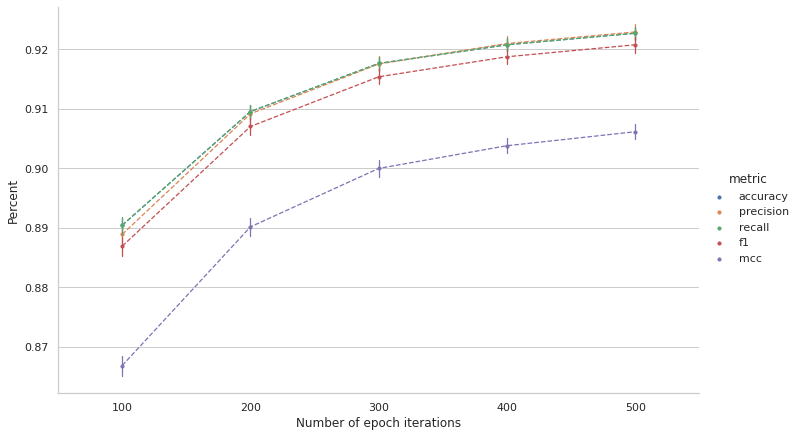

In [8]:
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
ax = sns.catplot(data=amelt,
                 x='epochs',
                 y='value',
                 hue='metric',
                 kind='point',
                 aspect=13/8,
                 height= 6,
                 linestyles='--',
                 linewidth=0.5)

ax.set(xlabel='Number of epoch iterations', ylabel='Percent')

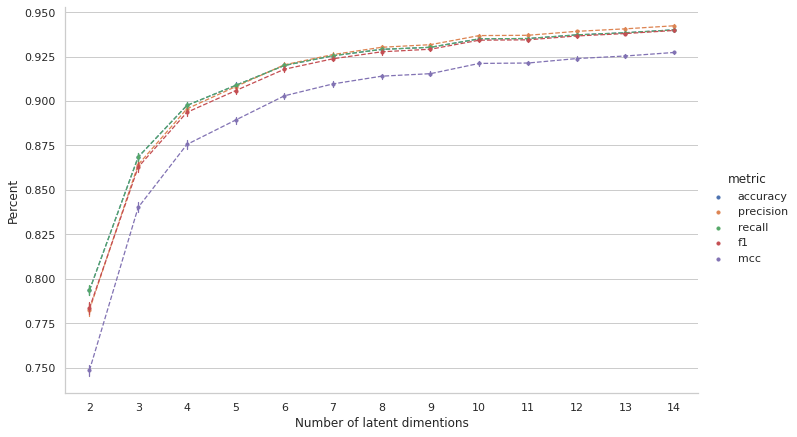

In [9]:
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
ax = sns.catplot(data=amelt,
                 x='latdim',
                 y='value',
                 hue='metric',
                 kind='point',
                 aspect=13/8,
                 height= 6,
                 linestyles='--',
                 linewidth=0.5)

ax.set(xlabel='Number of latent dimentions', ylabel='Percent')

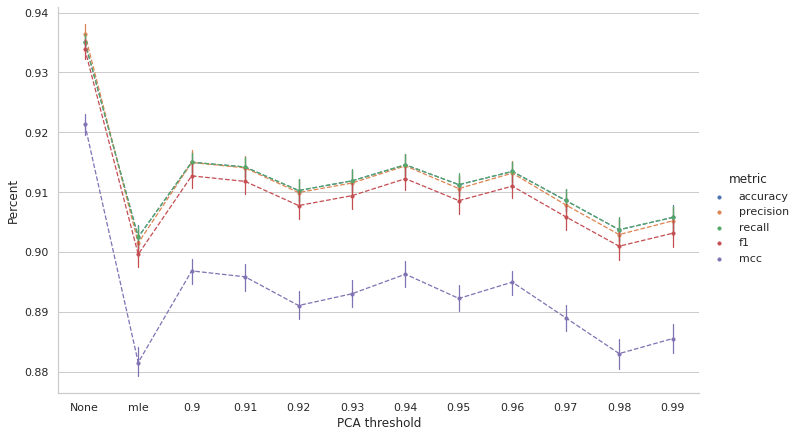

In [10]:
sns.set(style="whitegrid", rc={"lines.linewidth": 0.7})
ax = sns.catplot(data=amelt,
                 x='pca',
                 y='value',
                 hue='metric',
                 kind='point',
                 aspect=13/8,
                 height= 6,
                 linestyles='--',
                 linewidth=0.5)

ax.set(xlabel='PCA threshold', ylabel='Percent')

# ML metric comparison

## Baysian Network

In [11]:
bayes = maldf[maldf['modeltype'].str.contains('bayesian')]
print(bayes)
bayes['drtype'] = bayes['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')

                                           dimred modeltype  accuracy  \
0                                            none  bayesian  0.760350   
70                              autoencoder_100_2  bayesian  0.676173   
140                             autoencoder_100_3  bayesian  0.650414   
210                             autoencoder_100_4  bayesian  0.786569   
280                             autoencoder_100_5  bayesian  0.815547   
...                                           ...       ...       ...   
55090  pca_with_varthresh_0.99_autoencoder_500_10  bayesian  0.862925   
55160  pca_with_varthresh_0.99_autoencoder_500_11  bayesian  0.884085   
55230  pca_with_varthresh_0.99_autoencoder_500_12  bayesian  0.833487   
55300  pca_with_varthresh_0.99_autoencoder_500_13  bayesian  0.839006   
55370  pca_with_varthresh_0.99_autoencoder_500_14  bayesian  0.872125   

       precision    recall        f1       mcc  
0       0.835816  0.760350  0.790289  0.721719  
70      0.681878  0.67617

<ipython-input-11-f2bc1655bb0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayes['drtype'] = bayes['dimred']\


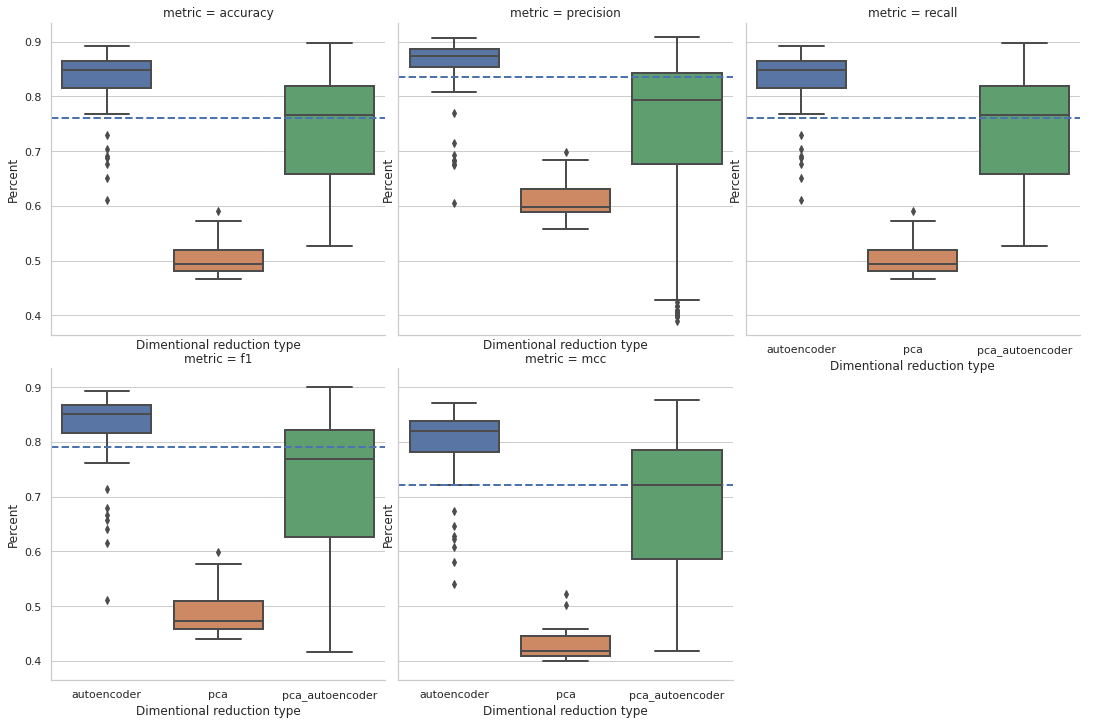

In [12]:
baymelt = bayes[bayes.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
baymelt['value'] = pd.to_numeric(baymelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=baymelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = bayes[bayes.drtype == 'none']
for a in ax.axes:
    b = base[(a.title.get_text().split(' = ')[1])].loc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [13]:
bayes.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.826474,0.849426,0.826474,0.824842,0.793444
none,0.760350,0.835816,0.760350,0.790289,0.721719
pca,0.507652,0.614327,0.507652,0.492787,0.435660
pca_autoencoder,0.742499,0.749942,0.742499,0.729427,0.690491


In [14]:
bayes.groupby('drtype', sort=False).max()

,dimred,modeltype,accuracy,precision,recall,f1,mcc
drtype,,,,,,,
none,none,bayesian,0.760350,0.835816,0.760350,0.790289,0.721719
autoencoder,autoencoder_500_9,bayesian,0.891904,0.906118,0.891904,0.892821,0.870143
pca,pca_with_varthresh_0.99,bayesian,0.589696,0.697568,0.589696,0.598669,0.522298
pca_autoencoder,pca_with_varthresh_mle_autoencoder_500_9,bayesian,0.896964,0.908418,0.896964,0.899499,0.875812


## SVMs

### SVM_POLY

In [16]:
svms = maldf[maldf['modeltype'].str.contains('svm_poly')]
svms['drtype'] = svms['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
print(svms)

                                           dimred modeltype  accuracy  \
1                                            none  svm_poly  0.955382   
71                              autoencoder_100_2  svm_poly  0.715271   
141                             autoencoder_100_3  svm_poly  0.688592   
211                             autoencoder_100_4  svm_poly  0.801288   
281                             autoencoder_100_5  svm_poly  0.850046   
...                                           ...       ...       ...   
55091  pca_with_varthresh_0.99_autoencoder_500_10  svm_poly  0.950322   
55161  pca_with_varthresh_0.99_autoencoder_500_11  svm_poly  0.946642   
55231  pca_with_varthresh_0.99_autoencoder_500_12  svm_poly  0.953542   
55301  pca_with_varthresh_0.99_autoencoder_500_13  svm_poly  0.945722   
55371  pca_with_varthresh_0.99_autoencoder_500_14  svm_poly  0.940662   

       precision    recall        f1       mcc           drtype  
1       0.967273  0.955382  0.955865  0.946753           

<ipython-input-16-3506139623b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms['drtype'] = svms['dimred']\


accuracy
precision
recall
f1
mcc


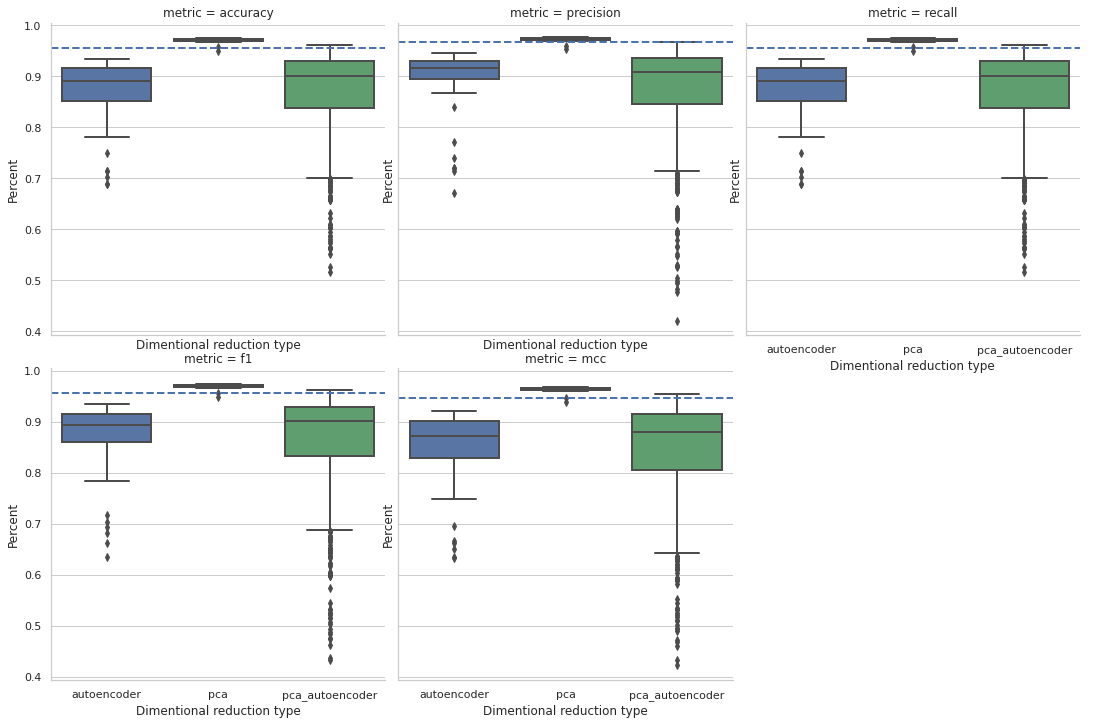

In [17]:
svmmelt = svms[svms.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
svmmelt['value'] = pd.to_numeric(svmmelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=svmmelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = svms[svms.drtype == 'none']
for a in ax.axes:
    print(a.title.get_text().split(' = ')[1])
    b = base[a.title.get_text().split(' = ')[1]].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [18]:
svms.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.872047,0.896940,0.872047,0.871524,0.848819
none,0.955382,0.967273,0.955382,0.955865,0.946753
pca,0.968094,0.971317,0.968094,0.968504,0.961453
pca_autoencoder,0.870619,0.873508,0.870619,0.863460,0.844051


In [19]:
svms.groupby('drtype', sort=False).max()

,dimred,modeltype,accuracy,precision,recall,f1,mcc
drtype,,,,,,,
none,none,svm_poly,0.955382,0.967273,0.955382,0.955865,0.946753
autoencoder,autoencoder_500_9,svm_poly,0.933763,0.945013,0.933763,0.935442,0.920562
pca,pca_with_varthresh_0.99,svm_poly,0.974701,0.977439,0.974701,0.975137,0.969437
pca_autoencoder,pca_with_varthresh_mle_autoencoder_500_9,svm_poly,0.962282,0.966876,0.962282,0.962663,0.954454


### SVM_RBF

In [20]:
svms = maldf[maldf['modeltype'].str.contains('svm_rbf')]
svms['drtype'] = svms['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
print(svms)

                                           dimred modeltype  accuracy  \
2                                            none   svm_rbf  0.978381   
72                              autoencoder_100_2   svm_rbf  0.819687   
142                             autoencoder_100_3   svm_rbf  0.779209   
212                             autoencoder_100_4   svm_rbf  0.920423   
282                             autoencoder_100_5   svm_rbf  0.937443   
...                                           ...       ...       ...   
55092  pca_with_varthresh_0.99_autoencoder_500_10   svm_rbf  0.950322   
55162  pca_with_varthresh_0.99_autoencoder_500_11   svm_rbf  0.948022   
55232  pca_with_varthresh_0.99_autoencoder_500_12   svm_rbf  0.956762   
55302  pca_with_varthresh_0.99_autoencoder_500_13   svm_rbf  0.950782   
55372  pca_with_varthresh_0.99_autoencoder_500_14   svm_rbf  0.945262   

       precision    recall        f1       mcc           drtype  
2       0.981003  0.978381  0.978586  0.973872           

<ipython-input-20-1e74350a42cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svms['drtype'] = svms['dimred']\


accuracy
precision
recall
f1
mcc


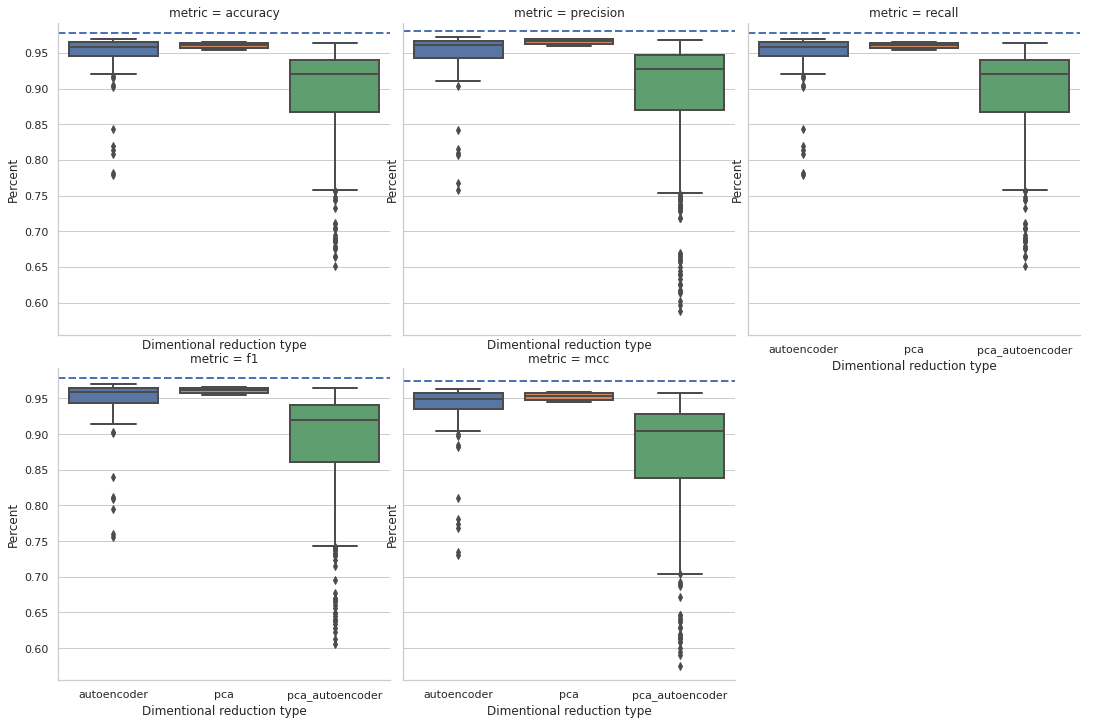

In [21]:
svmmelt = svms[svms.drtype != 'none'].melt(id_vars=['dimred', 'modeltype', 'drtype'],
                     var_name='metric', value_name='value')
svmmelt['value'] = pd.to_numeric(svmmelt['value'])
sns.set(style="whitegrid", rc={"lines.linewidth": 2})

ax = sns.catplot(data=svmmelt,x='drtype', y='value', col='metric', col_wrap=3,
           kind='box')

base = svms[svms.drtype == 'none']
for a in ax.axes:
    print(a.title.get_text().split(' = ')[1])
    b = base[a.title.get_text().split(' = ')[1]].iloc[0]
    a.axhline(b, ls='--')
    a.set(xlabel='Dimentional reduction type', ylabel='Percent')
#ax.axhline(baseacc)
#ax.set(xlabel='Dimentional recduction type', ylabel='Percent')

ax.add_legend()


In [22]:
svms.groupby('drtype').mean()

,accuracy,precision,recall,f1,mcc
drtype,,,,,
autoencoder,0.940924,0.941632,0.940924,0.939366,0.928363
none,0.978381,0.981003,0.978381,0.978586,0.973872
pca,0.960651,0.965666,0.960651,0.961194,0.952544
pca_autoencoder,0.895632,0.896019,0.895632,0.891061,0.873563


In [23]:
svms.groupby('drtype', sort=False).max()

,dimred,modeltype,accuracy,precision,recall,f1,mcc
drtype,,,,,,,
none,none,svm_rbf,0.978381,0.981003,0.978381,0.978586,0.973872
autoencoder,autoencoder_500_9,svm_rbf,0.970101,0.972464,0.970101,0.970301,0.963812
pca,pca_with_varthresh_0.99,svm_rbf,0.965501,0.970070,0.965501,0.966044,0.958378
pca_autoencoder,pca_with_varthresh_mle_autoencoder_500_9,svm_rbf,0.964581,0.968419,0.964581,0.965034,0.957207


## DTs

### variable tuning

In [143]:
dtrees = maldf[maldf['modeltype'].str.contains('dtree')]
dtrees['drtype'] = dtrees['dimred']\
    .replace(regex=r'autoencoder.*', value='autoencoder')\
    .replace(regex=r'pca_with_varthresh_[^_]*', value='pca')\
    .replace(regex=r'pca_with_mle', value='pca')
autos['pca'] = autos.dimred.str.extract(r'pca_with_varthresh_([^_]*)_')

print(dtrees)

KeyError: -1